In [23]:
#J = 0.1126 # kg*m^2 Solid Works measured
m_endLoad = 0.75 # kg # approx
m_beam = 2.5 # kg # approx
J = 2 * m_endLoad*(0.35**2) + (1/12)*(2*m_beam)*(0.70**2) # 2*J_load * J_beam # approximated
print('J = %.4f kg*m^2' % J)

alpha = 0.4 # rad/s^2
omega_max = 1.0 # rad/s

torque = J * alpha

P_max = torque * omega_max
print(f'P_max = {P_max:.4f} W')

SF = 5
P_motor = P_max * SF
print(f'P_motor = {P_motor:.4f} W')


J = 0.3879 kg*m^2
P_max = 0.1552 W
P_motor = 0.7758 W


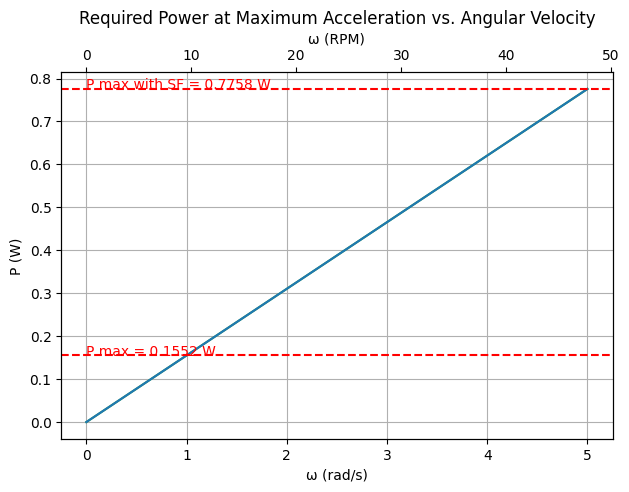

In [34]:
# plot required power vs. omega from 0 to 5 rad/s
# also add two x axses for unit rad/s and rpm
import numpy as np
import matplotlib.pyplot as plt

omega = np.linspace(0, 5, 100)
P = torque * omega
P_SF = P * SF

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('ω (rad/s)')
ax1.set_ylabel('P (W)')
plt.grid()
ax1.plot(omega, P, color=color)

ax2 = ax1.twiny()
ax2.set_xlabel('ω (RPM)')
ax2.plot(omega * 60/(2*np.pi), P)
ax2.tick_params(axis='x')

plt.axhline(y=P_motor, color='r', linestyle='--')
plt.text(0, P_motor, f'P max with SF = {P_motor:.4f} W', color='r')

plt.axhline(y=P_max, color='r', linestyle='--')
plt.text(0, P_max, f'P max = {P_max:.4f} W', color='r')

fig.tight_layout()
plt.title('Required Power at Maximum Acceleration vs. Angular Velocity')
plt.show()


Prismatic

In [37]:
r_pulley = 6.37 / 1000 # m
m_endLoad = 0.75 # kg # approx
m_load  = 2 * m_endLoad # kg # assumed

a = 0.250 # m/s^2 # requirement
v_max = 0.500 # m/s # requirement

omega_max = v_max / r_pulley

torque = m_load * a * r_pulley # approx without belt tension

P_max = torque * omega_max
print(f'P_max = {P_max:.4f} W')

SF = 5
P_motor = P_max * SF
print(f'P_motor = {P_motor:.4f} W')



P_max = 0.1875 W
P_motor = 0.9375 W


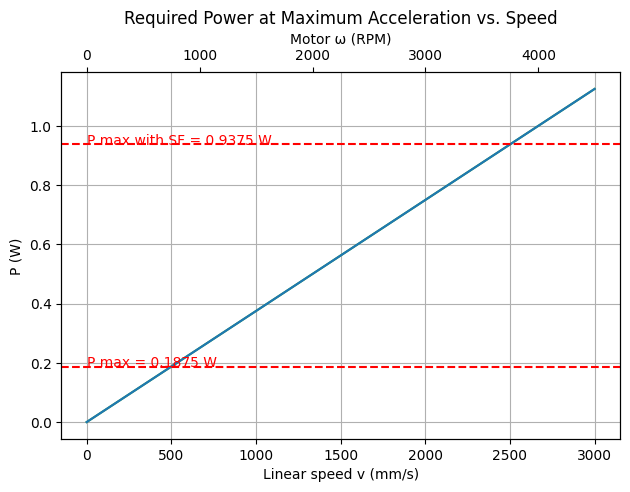

In [39]:
# plot required power vs. omega or speed from 0 to 2.000 m/s
# also add two x axses for unit mm/s and rpm

def P_at_omega(omega):
    return (m_load * a * r_pulley) * omega

def P_at_v(v):
    return (m_load * a * r_pulley) * (v / r_pulley)

v = np.linspace(0, 3.0, 1000)
v_mm = v * 1000
P = P_at_v(v)

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Linear speed v (mm/s)')
ax1.set_ylabel('P (W)')
ax1.plot(v_mm, P, color=color)

ax1.tick_params(axis='y')
plt.grid()

ax2 = ax1.twiny()
ax2.set_xlabel('Motor ω (RPM)')
ax2.plot(v * 60/(2*np.pi*r_pulley), P)
ax2.tick_params(axis='x')

plt.axhline(y=P_motor, color='r', linestyle='--')
plt.text(0, P_motor, f'P max with SF = {P_motor:.4f} W', color='r')

plt.axhline(y=P_max, color='r', linestyle='--')
plt.text(0, P_max, f'P max = {P_max:.4f} W', color='r')

fig.tight_layout()
plt.title('Required Power at Maximum Acceleration vs. Speed')
plt.show()